<font size="+2">Telcom Dataset - Predicción de Churn</font>

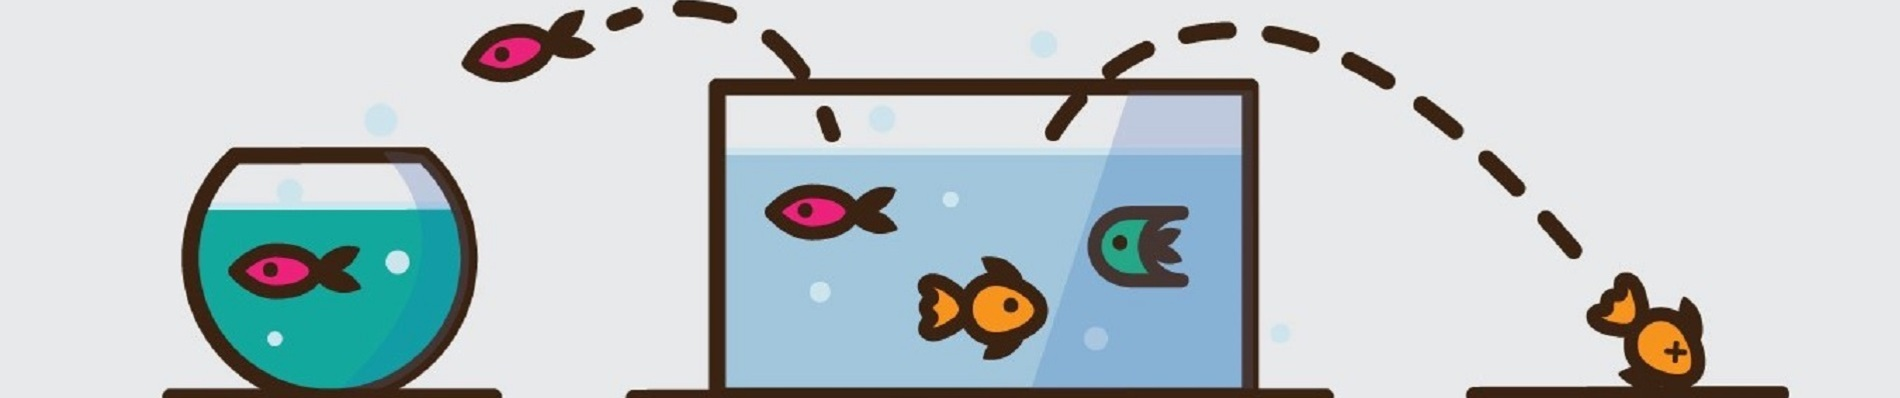

> El servicio es malo <br>
> Los beneficios no son muy buenos <br>
> La atencion al cliente es muy mala <br>

> *Adaptado a los comentarios comunes de clientes*
---------------- 



# Introducción

## Qué es el Customer Churn ?

Churn rate, también conocido como tasa de abandono de clientes, hace referencia al porcentaje de aquellos clientes que abandonan su servicio por un periodo de tiempo o definitivamente. El índice de rotación está muy vinculado a otro índice denominado índice de retención. Ambos son inversamente proporcionales, esto quiere decir, cuanto más alto es la retención, más bajo será la rotación (abandono). 

La pérdida de clientes es un concepto vital para determinar la eficiencia y la eficacia de una empresa: ¿cómo de buenos son sus servicios? ¿Pierde más clientes de los que gana? Cuanto más alto sea el índice de rotación, más clientes está perdiendo su empresa.

En general, es bastante normal que las empresas y los negocios ganen y pierdan clientes durante un periodo de tiempo. Sin embargo, es posible que últimamente en el dataset que se presenta para este proyecto exista una salida anormal de clientes, lo que hace saltar las alarmas. Puede haber muchas razones por las que se produce la fuga de clientes o por las que la tasa de fuga de clientes aumenta.


## Cómo se puede reducir el Customer Churn ?

Para poder reducir la tasa de abandono de clientes, las compañías de telecomunicación deben predecir si los clientes tienen un riesgo de abandonar o no la compañía. Para ello hay que hacer una detección temprana de este riesgo, haciendo un análisis detallado de los datos, con la finalidad que estos nos den una pista de que campo atacar para mejorar la tasa de abandono. A su vez es muy importante proponer un modelo de predicción que permita conocer el riesgo de abandono del cliente hacia su compañía. Por ello, este proyecto consiste en realizar un análisis y un modelo que permita atacar dicho problema.

## Objetivos de este análisis

El objetivo de este análisis consiste en revisar y responder varias preguntas:

* Qué contiene el dataset?
* El género importa en la tasa de abandono de clientes?
* Los clientes con pareja o dependencia tienden a tener una tasa de abandono?
* El tipo de contrato afecta la tasa de abandono?
* Que tipo de servicios son importantes para los clientes?
* Cual es el rol que juegan los cargos totales y mensuales?


# Importar librerías

In [1]:
## procesamiento de datos
import numpy as np
import pandas as pd

## graficas comunes
import seaborn as sns
import matplotlib
from matplotlib import style
import matplotlib.pyplot as plt

## graficos de visualizacion de calidad
import altair as alt
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.offline as pyo
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

## librerias para validacion de modelos ML


from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import plot_roc_curve
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.preprocessing import MinMaxScaler

## metrica accuracy
from sklearn import metrics
from sklearn.metrics import classification_report

## modelos
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier



# Preparación de datos

El conjunto de datos a utilizar se denomina `Telco-Customer-Churn.csv` el cual contiene información relacionada a la tasa de abandono de clientes hacia una compañía, incluyendo:

* **información demográfica**
* **información del servicio actual del cliente**
* **Churn: El cliente abandono o no la compañía**

A más detalle, el conjunto de datos se analizará una vez se lea la información y columnas que se tienen disponibles


## Lectura de datos

In [2]:
df_telco_churn = pd.read_csv('./in/Telco-Customer-Churn.csv')
df_telco_churn.head()

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No      30           No   
1  5575-GNVDE    Male              0      No         No    1020          Yes   
2  3668-QPYBK    Male              0      No         No      60          Yes   
3  7795-CFOCW    Male              0      No         No    1350           No   
4  9237-HQITU  Female              0      No         No      60          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0          No          No              No  Month-to-month              Yes   
1          No          No              No        One year               No   
2          No          No              No  Month-to-month              Yes   
3         Yes          No              No        One year               No   
4          No          No              No  Month-to-month              Yes   

               PaymentMethod MonthlyCharges  TotalCharges Churn  
0           Electronic check          29.85         29.85    No  
1               Mailed check          56.95        1889.5    No  
2               Mailed check          53.85        108.15   Yes  
3  Bank transfer (automatic)          42.30       1840.75    No  
4           Electronic check          70.70        151.65   Yes  

[5 rows x 21 columns]

Con la lectura del dataset, podemos notar la siguiente información:

* El dataset este compuesto por **22 columnas (características)** y **7043 filas (datos)**
* Se tiene el dato de abandono del cliente **Churn**
* Existe información demográfica de ayuda para el análisis: **gender (género), SeniorCitizen (tercera edad), Partner (pareja), Dependents (dependencias)**
* Tenemos información del servicio del cliente: **Servicios, cargos o costes,Contract (tipo de contrato), PaymentMethod (forma de pago)**

Con dichos datos, podemos hacer un análisis a fin de encontrar datos que nos ayuden a entender la tasa de abandono de los clientes. Adicional a ello, antes de realizar el análisis, se realiza un preprocesamiento o data wrangling el cual nos servirá para la fase del **modelo de predicción**.


## Preprocesamiento - Limpieza de información

El preprocesamiento o data wrangling es un proceso muy importante al momento de realizar un modelo de predicción, ya que este nos ayuda a eliminar data dispersa, datos categóricos, estandarizar información... etc. con la finalidad de mejorar los procesos de recomendación del modelo final. Como proceso inicial se realiza un **preprocesamiento inicial**, previo al preprocesamiento final, con el fin de realizar un análisis rápido de la información.

### Verificar los tipos de datos del dataset

Se verifican los tipos de datos para asegurarnos que las características tienen los tipos de datos correspondientes a su significado, caso contrario, se debe realizar una transformación a los mismos.

In [3]:
df_telco_churn.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

### Convertir TotalCharges en un tipo de dato numérico
Como podemos observar, el dato TotalCharges se encuentra como objeto, sin embargo, este debe ser de tipo float, tal cual como su antecesor MonthlyCharges, por lo tanto, se realiza una transformación de la misma.


In [4]:
df_telco_churn.TotalCharges = pd.to_numeric(df_telco_churn.TotalCharges,errors="coerce")
df_telco_churn.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

### Eliminar datos NaN o datos null
Uno de los problemas más grandes de conjuntos de datos son los valores null o NaN, que por lo general suelen ocasionar mucho ruido cuando se realiza un proceso de recomendación, predicción... etc. Por tanto, se verifica si existen valores nulos en el presente dataset y en caso de existir se procede a eliminar los mismos

In [5]:
df_telco_churn.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [6]:
ans_before= df_telco_churn.shape[0]
df_telco_churn.dropna(inplace = True)
ans_after = df_telco_churn.shape[0]
print('Inicialmente el dataset contenía {before} datos, despues de eliminar los datos NaN o nulls,'\
      'ahora el dataset contiene {after} datos.'.format(before=ans_before,after=ans_after))

Inicialmente el dataset contenía 7043 datos, despues de eliminar los datos NaN o nulls,ahora el dataset contiene 7032 datos.


### Convertir datos categoricos

Un proceso muy importante del preprocesamiento de datos es cuando se tienen datos categóricos. Los datos categóricos generalmente suelen ser datos cualitativos, es decir, no numéricos, esto provoca que dichos datos no puedan ser utilizados de forma directa en el modelo de predicción. Por tanto, estos datos se suelen convertir o transformar en datos numéricos, con la finalidad de que con dicha conversión los mismos puedan usarse en el modelo de predicción.

Sin embargo, hay que tomar en consideración que existen distintas formas de transformar un dato categórico a un numérico.

* **Conversión ordinal:** la categoría indica un orden. Algunos ejemplos de variables categóricas ordinales son: nivel de educación (primaria, secundaria, superior), las escalas de las encuestas de satisfacción (insatisfecho, neutro, satisfecho), calificación cualitativa (insuficiente, buena, muy buena, sobresaliente, muy sobresaliente), etc. La transformación para estas variables es más simple, las categorías en orden ascendente se transforman a un valor numérico empezando desde cero, ejemplo:

```
Satisfacción sobre un producto: no me gusta, neutro, me gusta

no me gusta: 0 neutro: 1 me gusta: 2
```

* **conversión nominal:**la categoría indica la identidad del objetivo. No hay un grado o diferencia entre las categorías, lo que se enfatiza es el nombre. Algunos ejemplos de variables categóricas nominales son: sexo, país, color de ojos, etc. La transformación habitual para estas variables es una transformación "Coding" o conversión a un código binario. Este proceso consiste en pasar las categorías en formato one_hot, que consiste en poner tantos ceros como categorías, y para representar un valor se coloca un uno en la posición del valor, ejemplo:

```
3 colores de ojos: azul, café, verde.

azul = [1,0,0] café = [0,1,0] verde = [0,0,1]

```

Si bien, la solución más simple para convertir datos categóricos es una **conversión ordinal**, esta contiene un **gran problema**, y es que los valores numéricos pueden ser malinterpretados por algunos algoritmos: si hemos codificado varias ciudades con los valores 0, 1, 2 y 3 ¿significa que la ciudad correspondiente al valor 3 es el triple que la que ha recibido el valor 1 (según algún criterio)? La respuesta es no, por supuesto.

Por este problema la solución más factible de conversión es utilizar una **conversión nominal**, ya que en esta se elimina la importancia o el peso del dato numérico. *


In [7]:
df_telco_churn_new = df_telco_churn.copy(deep=True)
# Elimino el valor de customer del dataset, puesto que no es relevante para el analisis
df_telco_churn_new = df_telco_churn_new.iloc[:,1:]
# convertir la variable de salida Churn, de una variable categorica a una numerica
df_telco_churn_new['Churn'].replace(to_replace='Yes', value=1, inplace=True)
df_telco_churn_new['Churn'].replace(to_replace='No' , value=0, inplace=True)
# convertimos las variables categoricas (objects type) en variables dummy
df_telco_churn_new =  pd.get_dummies(df_telco_churn_new)
df_telco_churn_new.head()

SeniorCitizen  tenure  MonthlyCharges  TotalCharges  Churn  gender_Female  \
0              0      30           29.85         29.85      0              1   
1              0    1020           56.95       1889.50      0              0   
2              0      60           53.85        108.15      1              0   
3              0    1350           42.30       1840.75      0              0   
4              0      60           70.70        151.65      1              1   

   gender_Male  Partner_No  Partner_Yes  Dependents_No  ...  \
0            0           0            1              1  ...   
1            1           1            0              1  ...   
2            1           1            0              1  ...   
3            1           1            0              1  ...   
4            0           1            0              1  ...   

   StreamingMovies_Yes  Contract_Month-to-month  Contract_One year  \
0                    0                        1                  0   
1                    0                        0                  1   
2                    0                        1                  0   
3                    0                        0                  1   
4                    0                        1                  0   

   Contract_Two year  PaperlessBilling_No  PaperlessBilling_Yes  \
0                  0                    0                     1   
1                  0                    1                     0   
2                  0                    0                     1   
3                  0                    1                     0   
4                  0                    0                     1   

   PaymentMethod_Bank transfer (automatic)  \
0                                        0   
1                                        0   
2                                        0   
3                                        1   
4                                        0   

   PaymentMethod_Credit card (automatic)  PaymentMethod_Electronic check  \
0                                      0                               1   
1                                      0                               0   
2                                      0                               0   
3                                      0                               0   
4                                      0                               1   

   PaymentMethod_Mailed check  
0                           0  
1                           1  
2                           1  
3                           0  
4                           0  

[5 rows x 46 columns]

In [8]:
df_telco_churn['Count']=1

# análisis exploratorio

Exploraremos el conjunto de datos con la finalidad de comprender mejor los patrones de los datos y formar potencialmente algunas hipótesis. Para ello, se realizará un análisis de información general que poco a poco iremos granulando a fin de encontrar tendencias de interés.


## Correlación inicial de características

<AxesSubplot:title={'center':'Correlación de datos con la tasa de abandono'}>

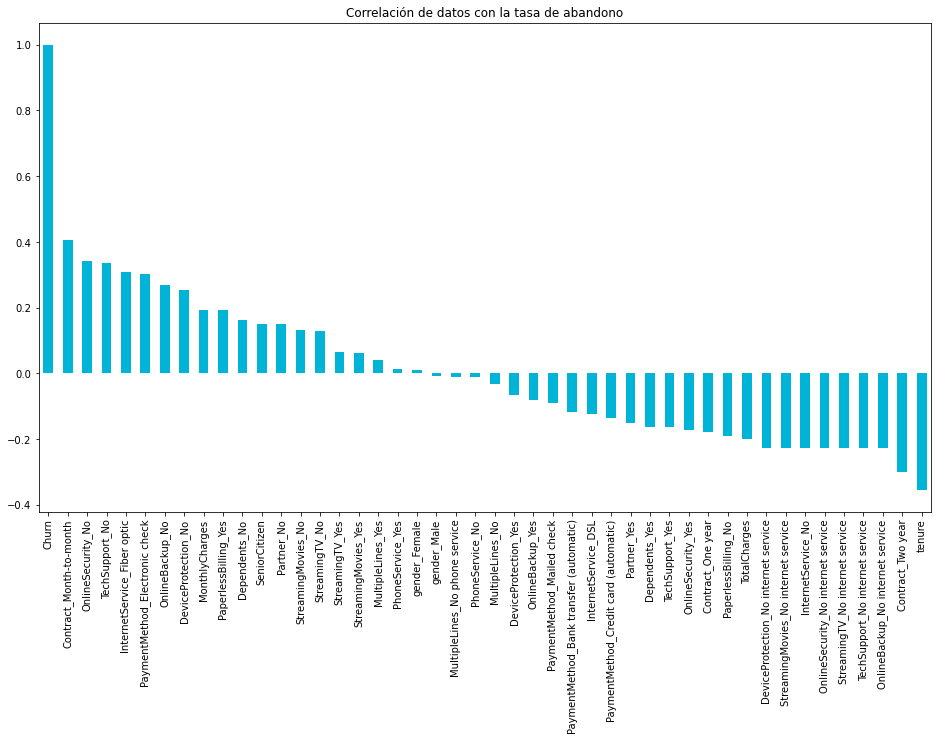

In [9]:
plt.figure(figsize=(16,9))
df_telco_churn_new.corr()['Churn'].sort_values(ascending = False).plot(kind='bar',color='#00b4d8',title='Correlación de datos con la tasa de abandono')

<div class="alert alert-success">
  <strong>Contrato mensual, ausencia de Seguridad online y Soporte técnico, características importantes!</strong> Como apreciamos en el gráfico de correlación dichas características tienen un rol positivo y fundamental en el proceso de abandono.</div>
  
<div class="alert alert-warning">
  <strong>El uso de internet en los servicios Streaming y Online!</strong> Tal parece que servicios Streaming y Online, no sirven de mucho si no se tiene servicio de internet generando una correlación negativa con la tasa de abandono.</div>
  
<div class="alert alert-danger">
  <strong>Contratos largos y antigüedad, no son tan relevantes!</strong> Parece que la permanencia y los contratos de uno y dos años parecen tener una correlación negativa con la pérdida de clientes.</div>


A continuación exploraremos los patrones de las correlaciones mencionadas antes de profundizar en la modelización e identificación de las variables importantes.

## Información demográfica

Entendemos por información demográfica datos relacionados a la información personal de cliente, ya sea su género, edad, relaciones... etc.

### Gender - Género

In [10]:
genders = df_telco_churn.groupby(['gender'])['Count'].agg([np.sum])
genders.reset_index(inplace=True)
genders['sum'] = (genders['sum'])/len(df_telco_churn)
genders = genders.round(3)

genders_churn = df_telco_churn.groupby(['gender','Churn'])['Count'].agg([np.sum])
genders_churn.reset_index(inplace=True)
genders_churn['sum'] = (genders_churn['sum'])/len(df_telco_churn)

In [11]:
bars = alt.Chart(genders).mark_bar(size=100).encode(
    x= alt.X("gender:O", axis=alt.Axis(title="genders",labelPadding=10)),
    y=alt.Y("sum:Q",  axis=alt.Axis(format=',.2%', title="% customers",grid=True,labelPadding=10)),
    color=alt.condition(
            alt.datum.gender == 'Male',
            alt.value('#00b4d8'),    
            alt.value('lightgrey')
            )
).properties(
            height=250,
            width=450,
             title={
              "text": ["Distribución de género"], 
              "subtitle": ["La mitad de nuestros clientes son hombres mientras que la otra mitad son mujeres"],
              "anchor":"start"
                
            }
)
text  =  bars.mark_text(
    align = 'center', 
    baseline = 'bottom', 
    dx = 0,   # Nudges text to right so it doesn't appear on top of the bar
    dy = 0,
    color='red',
    fontSize = 13
).encode(
    text = alt.Text('sum:Q', format='.0%'),
    color=alt.ColorValue('#000000')
)

chart_1 = (bars+text).display(
    renderer='svg',
    scaleFactor=2
)

alt.LayerChart(...)

<div class="alert alert-success">
  <strong>Paridad de géneros!</strong> Si bien existe una mínima diferencia entre géneros, podríamos decir que existe una similar cantidad de clientes mujeres y hombres.</div>

### SeniorCitizen - Tercera Edad

In [12]:
senior_citizen = df_telco_churn.groupby(['SeniorCitizen'])['Count'].agg([np.sum])
senior_citizen.reset_index(inplace=True)
senior_citizen['SeniorCitizen'].replace(to_replace=0, value='No', inplace=True)
senior_citizen['SeniorCitizen'].replace(to_replace=1, value='Yes', inplace=True)
senior_citizen['sum'] = (senior_citizen['sum'])/len(df_telco_churn)

In [13]:
bars = alt.Chart(senior_citizen).mark_bar(size=100).encode(
    x= alt.X("SeniorCitizen:O", axis=alt.Axis(title="SeniorCitizen",labelPadding=10)),
    y=alt.Y("sum:Q",  axis=alt.Axis(format=',.2%', title="% customers",grid=True,labelPadding=10)),
    color=alt.condition(
            alt.datum.SeniorCitizen == 'No',
            alt.value('#00b4d8'),    
            alt.value('lightgrey')
            )
).properties(
            height=250,
            width=450,
             title={
              "text": ["Distribución de tercera Edad"], 
              "subtitle": ["La mayoría de clientes no pertenecen a la tercera edad"],
              "anchor":"start"
                
            }
)
text  =  bars.mark_text(
    align = 'center', 
    baseline = 'bottom', 
    dx = 0,   # Nudges text to right so it doesn't appear on top of the bar
    dy = 0,
    color='red',
    fontSize = 13
).encode(
    text = alt.Text('sum:Q', format='.0%'),
    color=alt.ColorValue('#000000')
)

(bars+text).display(
    renderer='svg',
    scaleFactor=2
)

alt.LayerChart(...)

<div class="alert alert-success">
  <strong>La juventud predomina!</strong> Tan solo el 16% de clientes son de la tercera edad, por otro lado el resto de clientes no pertenecen a dicha categoría, lo que nos hace pensar que son jóvenes mayores de edad.</div>

Entendemos que si bien predominan aquellos clientes que son menores de edad, no se sabe si estos están por llegar a dicha categoría o tal vez son jóvenes mayores de edad por un rango menor a 40 años. Podemos tratar de relacionar dicha edad con los datos de relaciones y dependencias.

### Dependents | Partner - A cargo de terceras persona | parejas 

In [14]:
dependents_relations = pd.melt(df_telco_churn, id_vars=['Count'], value_vars=['Dependents','Partner'])
dependents_relations = dependents_relations.groupby(['variable','value']).count()
dependents_relations = dependents_relations/len(df_telco_churn)
dependents_relations.reset_index(inplace=True)

In [15]:
bar = alt.Chart(dependents_relations).mark_bar(size=80).encode(
    x=alt.X('Count:Q', axis=alt.Axis(title="% Customers"), stack='zero'),
    y=alt.Y('variable:O'),
    color=alt.Color('value:N',scale=alt.Scale(range=['#0096c7','lightgrey']))
).properties(
            height=250,
            width=550,
             title={
              "text": ["Distribución de Clientes con dependencia, parejas"], 
              "subtitle": ["Al rededor del 70% de clientes no estan a cargo de otras personas, mientras que el 48% de clientes tienen pareja "],
              "anchor":"start"
                
            }
)

text = bar.mark_text(dx=-30, dy=0).encode(
    x=alt.X('Count:Q', stack='zero'),
    y=alt.Y('variable:O'),
    detail='value:N',
    text=alt.Text('Count', format=',.2%'),
    order=alt.Order('color_Category_sort_index:Q'),
    color=alt.ColorValue('#000000')
)

(bar+text).display(
    renderer='svg',
    scaleFactor=2
)

alt.LayerChart(...)

<div class="alert alert-success">
  <strong>Existen muchos clientes jóvenes!</strong> Tomando en cuenta que muchas personas no están a cargo de terceras personas (hijos) y que existe cierta paridad entre personas que tienen y no tienen pareja, se podría dar a entender que la mayoría de clientes pueden estar en un rango menor a los 40 años.</div>


## información del cliente y sus servicios

Es interesante revisar la información del cliente referente a los servicios que actualmente tiene el cliente, como están distribuidos los contratos, si existe antigüedad en los clientes con sus servicios, cuanto es el gasto de cliente y su forma de pago.


### Contracts - Contratos

In [16]:
contracts = df_telco_churn.groupby(['Contract'])['Count'].agg([np.sum])
contracts.reset_index(inplace=True)

In [17]:
bars = alt.Chart(contracts).mark_bar(size=100).encode(
    x= alt.X("Contract:O", axis=alt.Axis(title="Contracts",labelPadding=10)),
    y=alt.Y("sum:Q",  axis=alt.Axis(title="customers",grid=True,labelPadding=10)),
    color=alt.condition(
            alt.datum.Contract == 'Month-to-month',
            alt.value('#00b4d8'),    
            alt.value('lightgrey')
            )
).properties(
            height=250,
            width=450,
             title={
              "text": ["Contratos"], 
              "subtitle": ["La mayoría de clientes tienen un contrato mensual, sin embargo, el resto de clientes tienden a tener contratos anuales mayormente a dos años"],
              "anchor":"start"
                
            }
)
bars.display(
    renderer='svg',
    scaleFactor=2
)

alt.Chart(...)

<div class="alert alert-success">
  <strong>Lo más común en servicios son contratos mensuales!</strong> Como vemos en la gráfica, la mayoría de contratos que tienen los clientes son mensuales, que por lo general, tiende a ser el contrato más común independientemente de la compañía. Por otro lado, existen cliente que realizan contratos anuales, siendo en su mayoría contratos de dos años.</div>


**Tal vez los contratos tenga una relación con la antigüedad del cliente con la compañía ?**. A continuación, presentamos un análisis que responde la pregunta en cuestión

### Tenure - antigüedad del cliente

In [18]:
month = pd.DataFrame(df_telco_churn[df_telco_churn['Contract']=='Month-to-month']['tenure'] * 0.03)
one_year = pd.DataFrame(df_telco_churn[df_telco_churn['Contract']=='One year']['tenure'] * 0.03)
two_year = pd.DataFrame(df_telco_churn[df_telco_churn['Contract']=='Two year']['tenure'] * 0.03)

In [19]:
bar = alt.Chart(month).mark_bar(opacity=0.5,interpolate='step',color='#00b4d8').encode(
    x = alt.X("tenure:Q", bin=alt.Bin(extent=[0, 70], step=5),axis=alt.Axis(title="Tenure(Meses)",labelPadding=10)),
    y=  alt.Y("count()",  axis=alt.Axis(title="# clientes",grid=True,labelPadding=10), scale=alt.Scale(domain=(0,1500)))
).properties(
            height=250,
            width=250,
             title={
              "text": ["Contrato mes a mes"], 
            }
)

bar_1 = alt.Chart(one_year).mark_bar(opacity=0.5,interpolate='step',color='#0096c7').encode(
    x = alt.X("tenure:Q", bin=alt.Bin(extent=[0, 70], step=5),axis=alt.Axis(title="Tenure(Meses)",labelPadding=10)),
    y=  alt.Y("count()",  axis=alt.Axis(title="# clientes",grid=True,labelPadding=10), scale=alt.Scale(domain=(0,1500)))
).properties(
            height=250,
            width=250,
             title={
              "text": ["Contrato de un año"], 
            }
)
bar_2 = alt.Chart(two_year).mark_bar(opacity=0.5,interpolate='step',color='#0077b6').encode(
    x = alt.X("tenure:Q", bin=alt.Bin(extent=[0, 70], step=5),axis=alt.Axis(title="Tenure(Meses)",labelPadding=10)),
    y=  alt.Y("count()",  axis=alt.Axis(title="# clientes",grid=True,labelPadding=10), scale=alt.Scale(domain=(0,1500)))
).properties(
            height=250,
            width=250,
             title={
              "text": ["Contrato de dos años"], 
            }
)

In [20]:
(bar | bar_1 | bar_2).properties(
             title={
              "text": ["Distribución de Clientes por antigüedad y contrato"], 
              "subtitle": ["Los clientes tienden a tener menos antigüedad en contratos mensuales, por otro lado, los clientes que se mantienen más tiempo tienen contrato de dos años"],
              "anchor":"start"
                
            }
).display(
    renderer='svg',
    scaleFactor=2
)

alt.HConcatChart(...)

<div class="alert alert-success">
  <strong>Tasa baja de abandono en contratos anuales!</strong> En la gráfica presente, para contratos de dos años, la antigüedad de clientes permanece por mucho más tiempo, alrededor de 70 meses.</div>


<div class="alert alert-danger">
  <strong>Tasa alta de abandono en contratos mensuales!</strong> Como vemos en la gráfica, la mayoría de clientes que tienen contratos mensuales, tienden a tener menos antigüedad, es decir, abandonan más rápido la compañía porque el contrato así lo permite.</div>


### Servicios

In [21]:
services = ['PhoneService','MultipleLines','InternetService','OnlineSecurity',
           'OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies']
fig = make_subplots(rows=3, cols=3,subplot_titles=services)

title = 'Distribución de los servicios usados por los clientes.'\
                  '<br><span style="font-size:10px"><i>Telcom dataset: '\
                  'Servicios usados por los clientes</span></i>'
for count, service in enumerate(services):
    item = pd.DataFrame(df_telco_churn[service].value_counts())
    trace1 = go.Bar(
        x=item.index,
        y=item[service].values,
        textposition='outside',
        marker=dict(
            color='rgba(0,180,216,0.6)'
        )
    )
    count = count + 1
    if count <=3:
        fig.add_trace(
            trace1,
            1,
            count
        )       
    elif count >3 and count <=6:
        fig.add_trace(
            trace1,
            2,
            count-3
        )
    elif count > 6:
        fig.add_trace(
            trace1,
            3,
            count-6
        )
fig.update_layout(title_text = title ,margin_t = 150, showlegend = False,plot_bgcolor = 'white',width = 1050, height = 1000)

<div class="alert alert-danger">
  <strong>Se necesita soporte técnico!</strong>La gran mayoría de clientes no tienen soporte técnico, lo cual es preocupante debido a que los servicios deben contar con soporte técnico para garantizar un mejor servicio para el cliente.</div>
  
  <div class="alert alert-warning">
  <strong>Servicio de Streaming y online a la par con servicios de internet!</strong> Tal parece que servicios Streaming y Online funcionan cuando el cliente tiene contratado servicio de internet. Sin embargo, la cantidad de clientes que no tienen Streaming están a la par con aquellos que si tienen. Por otro lado, los servicios online en su mayoría no lo tienen contratado.</div>


### Charges - Cargos

In [22]:
charges = df_telco_churn[['MonthlyCharges', 'TotalCharges']].sort_values(['TotalCharges'])

In [23]:
title = 'Relación entre Cargos mensaules y el Cargo total del cliente' \
                  '<br>Notamos que a medida que incrementa el cargo total, el cargo mensual aumenta.'\
                  '<br><span style="font-size:10px"><i>Telcom dataset: '\
                  'MonthlyCharges  y TotalCharges </span></i>'
fig = go.Figure(data=go.Scatter(x=charges.MonthlyCharges.values, y=charges.TotalCharges.values,mode='markers', marker=dict(
            color='#00b4d8'
        )))
fig.update_layout( xaxis_title="Cargo Mensual",
    yaxis_title="Cargo Total", title_text = title ,margin_t = 100, showlegend = False,plot_bgcolor = 'white', hovermode='closest')
fig.show()

<div class="alert alert-success">
  <strong>Cargo total y Cargo mensual relacionados!</strong> En la gráfica presente, podemos notar que a medida que el cargo mensual aumenta, el cargo total también y lo mismo de forma inversa.</div>

## Churn

Por último, analizar la tasa de abandono y ver como varían con respecto a varias características, entre los cuales, podemos notar como importantes la antigüedad del cliente, su edad, sus contratos y sus cargos mensual y total


In [24]:
churn = df_telco_churn.groupby(['Churn'])['Count'].agg([np.sum])
churn.reset_index(inplace=True)
churn['sum'] = churn['sum']/len(df_telco_churn)

In [25]:
bars = alt.Chart(churn).mark_bar(size=100).encode(
    x= alt.X("Churn:O", axis=alt.Axis(title="Churn",labelPadding=10)),
    y=alt.Y("sum:Q",  axis=alt.Axis(format=',.2%', title="% customers",grid=True,labelPadding=10)),
    color=alt.condition(
            alt.datum.Churn == 'No',
            alt.value('#a5be00'),    
            alt.value('lightgrey')
            )
).properties(
            height=250,
            width=450,
             title={
              "text": ["Tasa de abandono"], 
              "subtitle": ["Una gran cantidad de clientes prefieren permanecer con su compañía"],
              "anchor":"start"
                
            }
)
text  =  bars.mark_text(
    align = 'center', 
    baseline = 'bottom', 
    dx = 0,   # Nudges text to right so it doesn't appear on top of the bar
    dy = 0,
    color='red',
    fontSize = 13
).encode(
    text = alt.Text('sum:Q', format='.0%'),
    color=alt.ColorValue('#000000')
)

(bars+text).display(
    renderer='svg',
    scaleFactor=2
)

alt.LayerChart(...)

<div class="alert alert-danger">
  <strong>Datos muy sesgados!</strong>El 73% de clientes deciden continuar con su compañía. Claramente estos datos están muy sesgados ya que es indispensable pensar que no exista más cantidad de clientes que deciden abandonar su compañía actual. Eso ocasiona mucha asimetría de datos, sin embargo, en el proceso de modelos, tenemos que evitar dicho problema.</div>


### Churn vs tenure

In [26]:
title = 'Comparación entre Tenure y Churn' \
                  '<br>Podemos notar que aquellos clientes que no cambian de compañía, tienden a ser'\
                  '<br>los mas antiguos con su servicio.'\
                  '<br><span style="font-size:10px"><i>Telcom dataset: '\
                  'Tenure  y Churn </span></i>'
fig = go.Figure(go.Box(x=df_telco_churn['Churn'],y=df_telco_churn['tenure']*0.03,marker=dict(
            color='#a5be00'
        )))
fig.update_layout( xaxis_title="Churn",
    yaxis_title="Antigüedad", title_text = title, showlegend = False,plot_bgcolor = 'white', hovermode='closest')
fig.show()

<div class="alert alert-warning">
  <strong>Clientes antiguos fieles a la compañía!</strong>Con el grafico presentado, podemos notar que aquellos clientes que llevan más tiempo con el servicio, son aquellos que menos deciden abandonar su compañía, mientras que por otro lado, aquellos con menos antigüedad son más frecuentes a abandonar la compañía contratada.</div>



### Churn por Contract

In [27]:
class PolarPlot():
    
    def __init__(self,title):
        pyo.init_notebook_mode()
        self.figure = go.Figure()
        self.range = (0,0)
        self.title = title
        self.theta = ['Month-to-month', 'One year', 'Two year','Month-to-month']
    
    
    def update_layout(self):
        self.figure.update_layout(
            showlegend = True,
            title_text = self.title,
            title_font_color = '#333333',
            title_font_size = 14,
            legend_font_color = 'grey',
            width = 800,
            height = 500
        )
    
    def update_polar_layout(self):
        self.figure.update_layout(
            polar_bgcolor='white', 
            polar_radialaxis_visible=True,
            polar_radialaxis_showticklabels=True,
            polar_radialaxis_tickfont_color='darkgrey',
            polar_angularaxis_color='grey',
            polar_angularaxis_showline=False, 
            polar_radialaxis_showline=False, 
            polar_radialaxis_layer='below traces', 
            polar_radialaxis_gridcolor='#F2F2F2',
            legend_itemclick = 'toggleothers',
            legend_itemdoubleclick = 'toggle',
            polar_radialaxis_range=self.range
        )
    
    def add_data(self,data, country, color, hover_template='%{r:0.0f}%'):
        highlight = color != 'lightslategrey'
        data.append(data[0])
        self.figure.add_trace(
            go.Scatterpolar(
                r=data,
                theta=self.theta,
                mode='lines',
                name=country,
                hoverinfo='name+r',
                hovertemplate=hover_template,
                line_color=color,
                showlegend=highlight, 
                opacity= 0.8 if highlight else 0.2,
                line_shape='spline',
                line_smoothing=0.8,
                line_width=1.8 if highlight else 0.6
            )
        )
        self.update_range(data)
    
    def update_range(self, data):
        max_range = max(data) * 1.1
        self.range = (0, max_range) if max_range > self.range[1] else self.range
        
    def show(self):
        self.update_layout() 
        self.update_polar_layout()
        self.figure.show()
class ChurnByContract():
    def __init__(self, contract_color, polar_plot):
        self.churns = list(set(df_telco_churn.Churn.unique().tolist())) 
        self.contract_color = contract_color
        self.polar = polar_plot
    

    def add_traces_percentage(self, data):
        for churn in self.churns:
            data_filtered = data[data.Churn == churn]
            color = self.contract_color.get(churn, 'lightslategrey')
            plot_data = data_filtered.groupby(['Contract'],as_index=False)['Count'].agg([np.sum]).reset_index()
            plot_data = plot_data['sum'].apply(lambda x: x/ len(df_telco_churn[df_telco_churn.Contract == plot_data[plot_data['sum'] == x]['Contract'].values[0]]) * 100).tolist()
            self.polar.add_data(plot_data, churn, color)
                
    
    def adjust_layout_percentage(self):
        self.polar.figure.update_layout(
            polar_radialaxis_tickvals=[25,40,70],
            polar_radialaxis_ticktext=['20%','40%','70%'],
            polar_radialaxis_tickmode='array',
        )       


In [28]:
pp = PolarPlot('Los clientes con contratos de dos años tienen una tasa de abandono muy baja.' \
               '<br>Sin embargo, los clientes de contratos mensuales tienen una tasa de abandono alta.'
               '<br><span style="font-size:10px"><i>Telcom dataset: Suma 100% por Churn.<br>')

p_color = {
    'Yes': '#a5be00',
    'No': '#00b4d8'
}

plot = ChurnByContract(p_color, pp)
plot.add_traces_percentage(df_telco_churn)
plot.adjust_layout_percentage()
plot.polar.show()

<div class="alert alert-success">
  <strong>Los contratos anuales, una buena opción para mantener al cliente!</strong> Podemos notar que los contratos anuales son una opción muy buena para disminuir en fuerte medida el abandono del cliente, ya que como podemos notar, los contratos mensuales contienen una mayor cantidad de abandonos.</div>

### Churn by Seniority

In [29]:
seniority_churn = df_telco_churn.groupby(['SeniorCitizen','Churn'],as_index=False)['Count'].agg([np.sum]).reset_index()
seniority_churn['sum'] = seniority_churn['sum'].apply(lambda x: x/ len(df_telco_churn[df_telco_churn.SeniorCitizen == seniority_churn[seniority_churn['sum'] == x]['SeniorCitizen'].values[0]]))

In [30]:
bar = alt.Chart(seniority_churn).mark_bar(size=80).encode(
    x=alt.X('sum:Q', axis=alt.Axis(title="% Customers"), stack='zero'),
    y=alt.Y('SeniorCitizen:O'),
    color=alt.Color('Churn:N',scale=alt.Scale(range=['#a5be00','lightgrey']))
).properties(
            height=250,
            width=550,
             title={
              "text": ["Churn por nivel de edad"], 
              "subtitle": ["Los clientes de tercera edad tienen el doble de taza de abandono a comparación de aquellos que no pertenecen a dicha categoria "],
              "anchor":"start"
                
            }
)

text = bar.mark_text(dx=-30, dy=0).encode(
    x=alt.X('sum:Q', stack='zero'),
    y=alt.Y('SeniorCitizen:O'),
    detail='Churn:N',
    text=alt.Text('sum', format=',.2%'),
    order=alt.Order('color_Category_sort_index:Q'),
    color=alt.ColorValue('#000000')
)

(bar+text).display(
    renderer='svg',
    scaleFactor=2
)

alt.LayerChart(...)

<div class="alert alert-warning">
  <strong>Clientes jóvenes son más estables!</strong> Como podemos apreciar en la gráfica, aquellos clientes que no pertenecen a la tercera edad tienen una tasa más baja de abandono, por otro lado aquellos que si pertenecen a la tercera edad tienen una tasa de abandono equivalente al doble de aquellos que no pertenecen a ese grupo.</div>


### Churn por cargos mensuales y totales

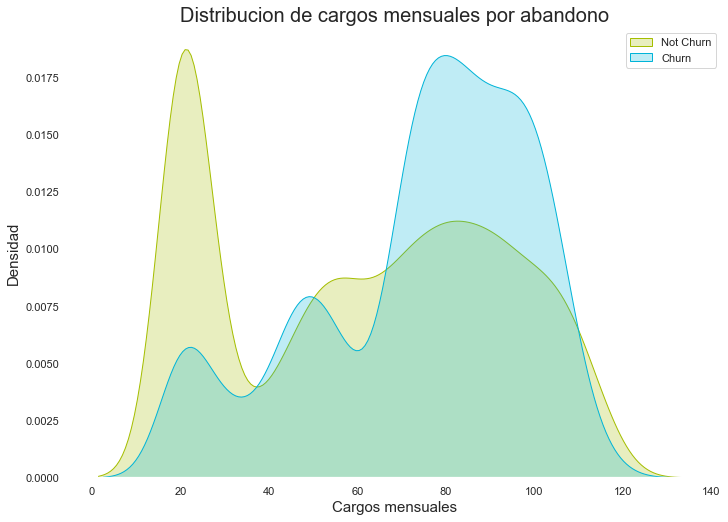

In [31]:
sns.set(rc={'figure.figsize':(11.7,8.27,),'figure.facecolor':'white','axes.facecolor':'white'})
ax = sns.kdeplot(df_telco_churn.MonthlyCharges[(df_telco_churn["Churn"] == 'No')],color="#a5be00", shade = True)
ax = sns.kdeplot(df_telco_churn.MonthlyCharges[(df_telco_churn["Churn"] == 'Yes') ], color="#00b4d8", shade= True)
ax.legend(["Not Churn","Churn"],loc='upper right')
ax.set_ylabel('Densidad',fontsize=15)
ax.set_xlabel('Cargos mensuales',fontsize=15)
ax.set_title('Distribucion de cargos mensuales por abandono',fontsize=20)
plt.savefig('figures/eda/cargost_churn.png')

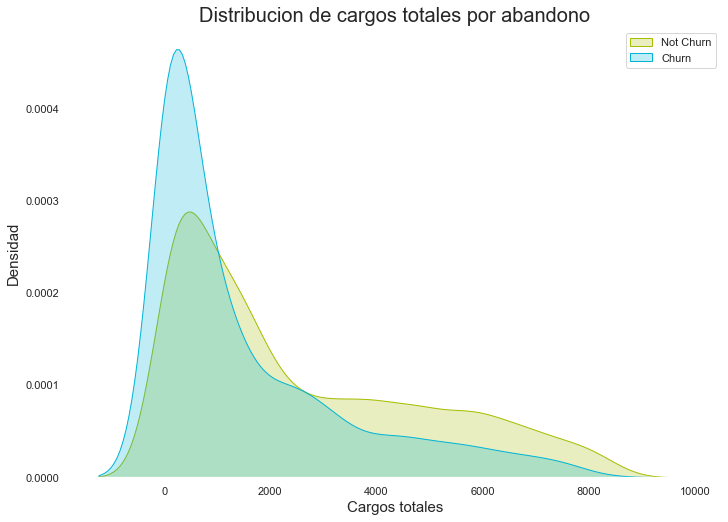

In [32]:
sns.set(rc={'figure.figsize':(11.7,8.27,),'figure.facecolor':'white','axes.facecolor':'white'})
ax = sns.kdeplot(df_telco_churn.TotalCharges[(df_telco_churn["Churn"] == 'No')],color="#a5be00", shade = True)
ax = sns.kdeplot(df_telco_churn.TotalCharges[(df_telco_churn["Churn"] == 'Yes') ], color="#00b4d8", shade= True)
ax.legend(["Not Churn","Churn"],loc='upper right')
ax.set_ylabel('Densidad',fontsize=15)
ax.set_xlabel('Cargos totales',fontsize=15)
ax.set_title('Distribucion de cargos totales por abandono',fontsize=20)
plt.savefig('figures/eda/cargost_churn.png')

<div class="alert alert-warning">
  <strong>Cargos mensuales altos y cargos Totales bajos generan abandono!</strong> Parece un poco raro, sin embargo, como se presentan las gráficas a continuación, los clientes tienden a abandonar la compañia cuando sus cargos totales son bajos, sin embargo entendemos que también depende de sus cargos mensuales altos.</div>

# Modelos de predicción

Para el presente proyecto, se ha decidido trabajar con 3 modelos de predicción orientados al ambito del aprendizaje supervisado. Estos modelos son:

* **Regresión logística**: La regresión logística es una técnica de aprendizaje supervisado para clasificación. Es muy usada en muchas industrias debido a su escalabilidad y explicabilidad.
* **ADA Boost**: Este algoritmo, mediante un entrenamiento iterativo de los clasificadores débiles o de base, le asigna mayor importancia a los datos mal clasificados anteriormente, y de esta manera obtiene un nuevo clasificador. Logra, de esta forma, adaptarse y obtener mejores resultados aumentando la precisión del algoritmo
* **XG Boost**: XGBoost es la abreviatura de las palabras inglesas "extreme gradient boosting" (refuerzo de gradientes extremo). Este método se basa en árboles de decisión y supone una mejora sobre otros métodos, como el bosque aleatorio y refuerzo de gradientes. Funciona bien con datasets grandes y complejos al utilizar varios métodos de optimización.


## Aprendizaje Supervisado

En el aprendizaje supervisado, los algoritmos trabajan con datos “etiquetados” (labeled data), intentado encontrar una función que, dadas las variables de entrada (input data), les asigne la etiqueta de salida adecuada. El algoritmo se entrena con un “histórico” de datos y así “aprende” a asignar la etiqueta de salida adecuada a un nuevo valor, es decir, predice el valor de salida.

## Preparación de datos

Para preparar los datos realizamos el siguiente proceso:

* Separamos los datos de entrada y salida, esto con el objetivo de obtener nuestras características separadas del valor a predecir, a nuestros datos de entrada los llamamos feature y a los de salida target.
* Al tener data asimétrica, una de las soluciones que se pueden dar es estandarizar los datos escalándolos, para ello utilizamos la técnica MinMax que permite escalar los datos dado un rango, en este caso de (0,1)
* Por último dividimos los datos en un conjunto de datos de entrenamiento y otro conjunto de datos de prueba utilizando la técnica del 80-20.


### Separando datos en features y targets

In [33]:
y = df_telco_churn_new['Churn'].values
X = df_telco_churn_new.drop(columns = ['Churn'])
print("Feature y target obtenidos ....")

Feature y target obtenidos ....


### Escalando datos - Estandarización

In [34]:
# Scaling all the variables to a range of 0 to 1
features = X.columns.values
scaler = MinMaxScaler(feature_range = (0,1))
scaler.fit(X)
X = pd.DataFrame(scaler.transform(X))
X.columns = features
print("Datos escalados ....")

Datos escalados ....


### Separando datos en train y test

In [35]:
# Create Train & Test Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=99)
print("Datos divididos en train y test ....")

Datos divididos en train y test ....


## Modelos de ML

In [36]:
sns.set(rc={'figure.figsize':(5.7,5.27,),'figure.facecolor':'white','axes.facecolor':'white'})
def model(classifier,x_train,y_train,x_test,y_test,model):
    
    classifier.fit(x_train,y_train)
    prediction = classifier.predict(x_test)
    cv = RepeatedStratifiedKFold(n_splits = 10,n_repeats = 3,random_state = 1)
    print("Cross Validation Score : ",'{0:.3%}'.format(cross_val_score(classifier,x_train,y_train,cv = cv,scoring = 'roc_auc').mean()))
    print("ROC_AUC Score : ",'{0:.3%}'.format(roc_auc_score(y_test,prediction)))
    plt.figure(figsize=(3, 3))
    plot_roc_curve(classifier, x_test,y_test)
    plt.title('ROC_AUC_Plot - {}'.format(model))
    plt.savefig("{}.png".format(model))
    plt.show()

def model_evaluation(classifier,x_test,y_test,model):
    
    cm = confusion_matrix(y_test,classifier.predict(x_test))
    names = ['True Neg','False Pos','False Neg','True Pos']
    counts = [value for value in cm.flatten()]
    percentages = ['{0:.2%}'.format(value) for value in cm.flatten()/np.sum(cm)]
    labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(names,counts,percentages)]
    labels = np.asarray(labels).reshape(2,2)
    hm = sns.heatmap(cm,annot = labels,cmap = 'Blues',fmt ='')
    figure = hm.get_figure()    
    figure.savefig('{}_heatmap.png'.format(model), dpi=400)
    

    print(classification_report(y_test,classifier.predict(x_test)))

In [37]:
classifier_adb = AdaBoostClassifier()
classifier_xgb = XGBClassifier(learning_rate= 0.01,max_depth = 3,n_estimators = 1000)
logistic_regression = LogisticRegression()

### Regresión logística

Cross Validation Score :  83.966%
ROC_AUC Score :  73.442%


<Figure size 216x216 with 0 Axes>

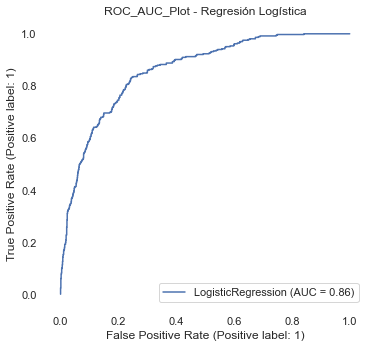

In [38]:
model(logistic_regression,X_train,y_train,X_test,y_test,'Regresión Logística')

              precision    recall  f1-score   support

           0       0.85      0.91      0.88      1042
           1       0.69      0.56      0.62       365

    accuracy                           0.82      1407
   macro avg       0.77      0.73      0.75      1407
weighted avg       0.81      0.82      0.81      1407



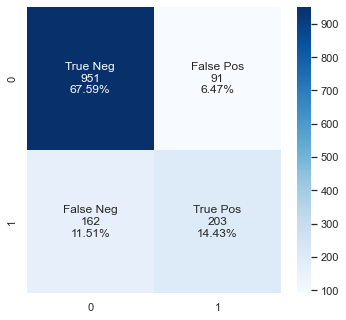

In [39]:
model_evaluation(logistic_regression,X_test,y_test,'Regresión Logística')

### XG Boost

In [ ]:
model(classifier_xgb,X_train,y_train,X_test,y_test,'XG Boost')

In [ ]:
model_evaluation(classifier_xgb,X_test,y_test,'XG Boost')

### ADA Boost 

In [ ]:
model(classifier_adb,X_train,y_train,X_test,y_test,'ADA Boost')

In [ ]:
model_evaluation(classifier_adb,X_test,y_test,'ADA Boost')

## análisis de los modelos

Después de realizar el análisis, entrenamiento y evaluación de los modelos de predicción, podemos notar que el modelo de predicción **XG Boost** obtiene un accuracy más alto. Por lo tanto, este modelo es el ganador en comparación a los tres modelos, sin embargo, utilizaremos el modelo de regresión logística para obtener los coeficientes para predicción, si bien no es el modelo que triunfo, la diferencia entre ambos modelos es mínima, por lo cual, podemos deducir que sus coeficientes son similares. A continuación, presentamos las variables con más impacto en la predicción


In [ ]:
weights = pd.Series(logistic_regression.coef_[0],
                 index=X.columns.values)
print (weights.sort_values(ascending = False)[:10].plot(kind='bar',color='#00b4d8'))

In [ ]:
print(weights.sort_values(ascending = False)[-10:].plot(kind='bar',color='#00b4d8'))

<div class="alert alert-warning">
  <strong>Los contratos mensuales son una característica muy importante!</strong> Como podemos ver en el gráfico de coeficientes, los contratos mensuales son aumentan el abandono del cliente, por lo que se entendería que si un cliente tiene un tipo de contrato anual, como el de dos años, el cliente tiende a no abandonar el servicio.</div>

# Prueba final

Para esta prueba, solamente tomaremos un cliente y se hará un cambio en el tipo de contrato con el objetivo de demostrar la hipótesis anterior. Para ello se toma el primer cliente del dataset y se procede a cambiar del contrato.


## Cliente con contrato de mes a mes

In [ ]:
data =  X.iloc[0]
data['Contract_Month-to-month'] = 1
data['Contract_Two year'] = 0
prueba = pd.DataFrame([data.values],columns=X.columns)
prueba[['Contract_Month-to-month','Contract_Two year']]

In [ ]:
print('resultado de la predicción con cliente que tiene contrato de mes a mes: ',classifier_xgb.predict(prueba)[0])

## Cliente con contrato de dos años

In [ ]:
data =  X.iloc[0]
data['Contract_Month-to-month'] = 0
data['Contract_Two year'] = 1
prueba = pd.DataFrame([data.values],columns=X.columns)
prueba[['Contract_Month-to-month','Contract_Two year']]

In [ ]:
print('resultado de la predicción con cliente que tiene contrato de dos años: ',classifier_xgb.predict(prueba)[0])

# Conclusiones

<div class="alert alert-success">
  <strong>Los contratos anuales bajan la tasa de abandono del cliente!</strong> Confirmamos, que el efecto de tener un contrato largo, hace que el cliente tenga una mayor antigüedad con el servicio y a la final exista una menor tasa de abandono.</div>

<div class="alert alert-danger">
  <strong>El soporte técnico es importante!</strong> Clientes que no cuentan con soporte técnico, tienden a abandonar su servicio, como lo vimos en la gráfica de coeficientes, por lo tanto es muy importante que las compañías tomen en cuenta el ofrecer soporte técnico a diferencia de otros servicios.</div>

<div class="alert alert-warning">
  <strong>Clientes con internet DSL tienen menos tasa de abandono que aquellos que tiene Fibra óptica!</strong> Es interesante esta conclusión, pero como hemos visto en los gráficos anteriores, aquellos clientes que tienen fibra óptica tienden a abandonar la empresa que contrato, aunque la misma ofrece más velocidad.</div>